<a href="https://colab.research.google.com/github/RaminTKhameneh/AAI695HWs/blob/main/Homework_3_Ramin_Khameneh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Step 1

In [ ]:
df = pd.read_csv('drive/MyDrive/695HW/Titanic.csv')
df

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1st,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.337494,B5,Southampton,2,NaN,"St Louis, MO"
1,2,1st,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.550003,C22 C26,Southampton,11,NaN,"Montreal, PQ / Chesterville, ON"
2,3,1st,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,4,1st,0,"Allison, Mr. Hudson Joshua Crei",male,30.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,5,1st,0,"Allison, Mrs. Hudson J C (Bessi",female,25.0000,1,2,113781,151.550003,C22 C26,Southampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3rd,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.454200,NaN,Cherbourg,NaN,328.0,NaN
1305,1306,3rd,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.454200,NaN,Cherbourg,NaN,NaN,NaN
1306,1307,3rd,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.225000,NaN,Cherbourg,NaN,304.0,NaN
1307,1308,3rd,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.225000,NaN,Cherbourg,NaN,NaN,NaN


Fill missing values and drop columns with huge amount of no NA. We split the data in 2nd step.

In [ ]:
df['age'] = df['age'].fillna(df['age'].mean())
df['fare'] = df['fare'].fillna(df['fare'].mean())
df['embarked'] = df['embarked'].fillna(df['embarked'].value_counts().idxmax())
df = df.drop(columns=['cabin', 'boat', 'body', 'home.dest'])

## Step 2

Making sure ‘survived’ is a qualitative variable taking 1 (yes) or 0 (no) in your code.

In [ ]:
df['survived'].unique()

array([1, 0])

Mapping categorical values into numerical values

In [ ]:
df['pclass'].unique(),df['sex'].unique(),df['sibsp'].unique()

(array(['1st', '2nd', '3rd'], dtype=object),
 array(['female', 'male'], dtype=object),
 array([0, 1, 2, 3, 4, 5, 8]))

In [ ]:
df['pclass'] = df['pclass'].map({'1st': 1, '2nd': 2, '3rd': 3})
df['sex'] = df['sex'].map({'male': 0, 'female': 1})

Spliting the dataset into train and test sets


In [ ]:
X = df[['pclass', 'sex', 'age', 'sibsp']]
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Fitting a decision tree and plotting the full tree


[Text(0.4699014234293194, 0.9736842105263158, 'sex <= 0.5\ngini = 0.463\nsamples = 1047\nvalue = [665, 382]\nclass = Not Survived'),
 Text(0.17553583115183247, 0.9210526315789473, 'age <= 9.5\ngini = 0.288\nsamples = 677\nvalue = [559, 118]\nclass = Not Survived'),
 Text(0.0474694589877836, 0.868421052631579, 'sibsp <= 2.5\ngini = 0.48\nsamples = 35\nvalue = [14, 21]\nclass = Survived'),
 Text(0.027923211169284468, 0.8157894736842105, 'age <= 0.792\ngini = 0.227\nsamples = 23\nvalue = [3, 20]\nclass = Survived'),
 Text(0.016753926701570682, 0.7631578947368421, 'sibsp <= 0.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = Not Survived'),
 Text(0.011169284467713788, 0.7105263157894737, 'age <= 0.375\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Not Survived'),
 Text(0.005584642233856894, 0.6578947368421053, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Not Survived'),
 Text(0.016753926701570682, 0.6578947368421053, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Survived'),

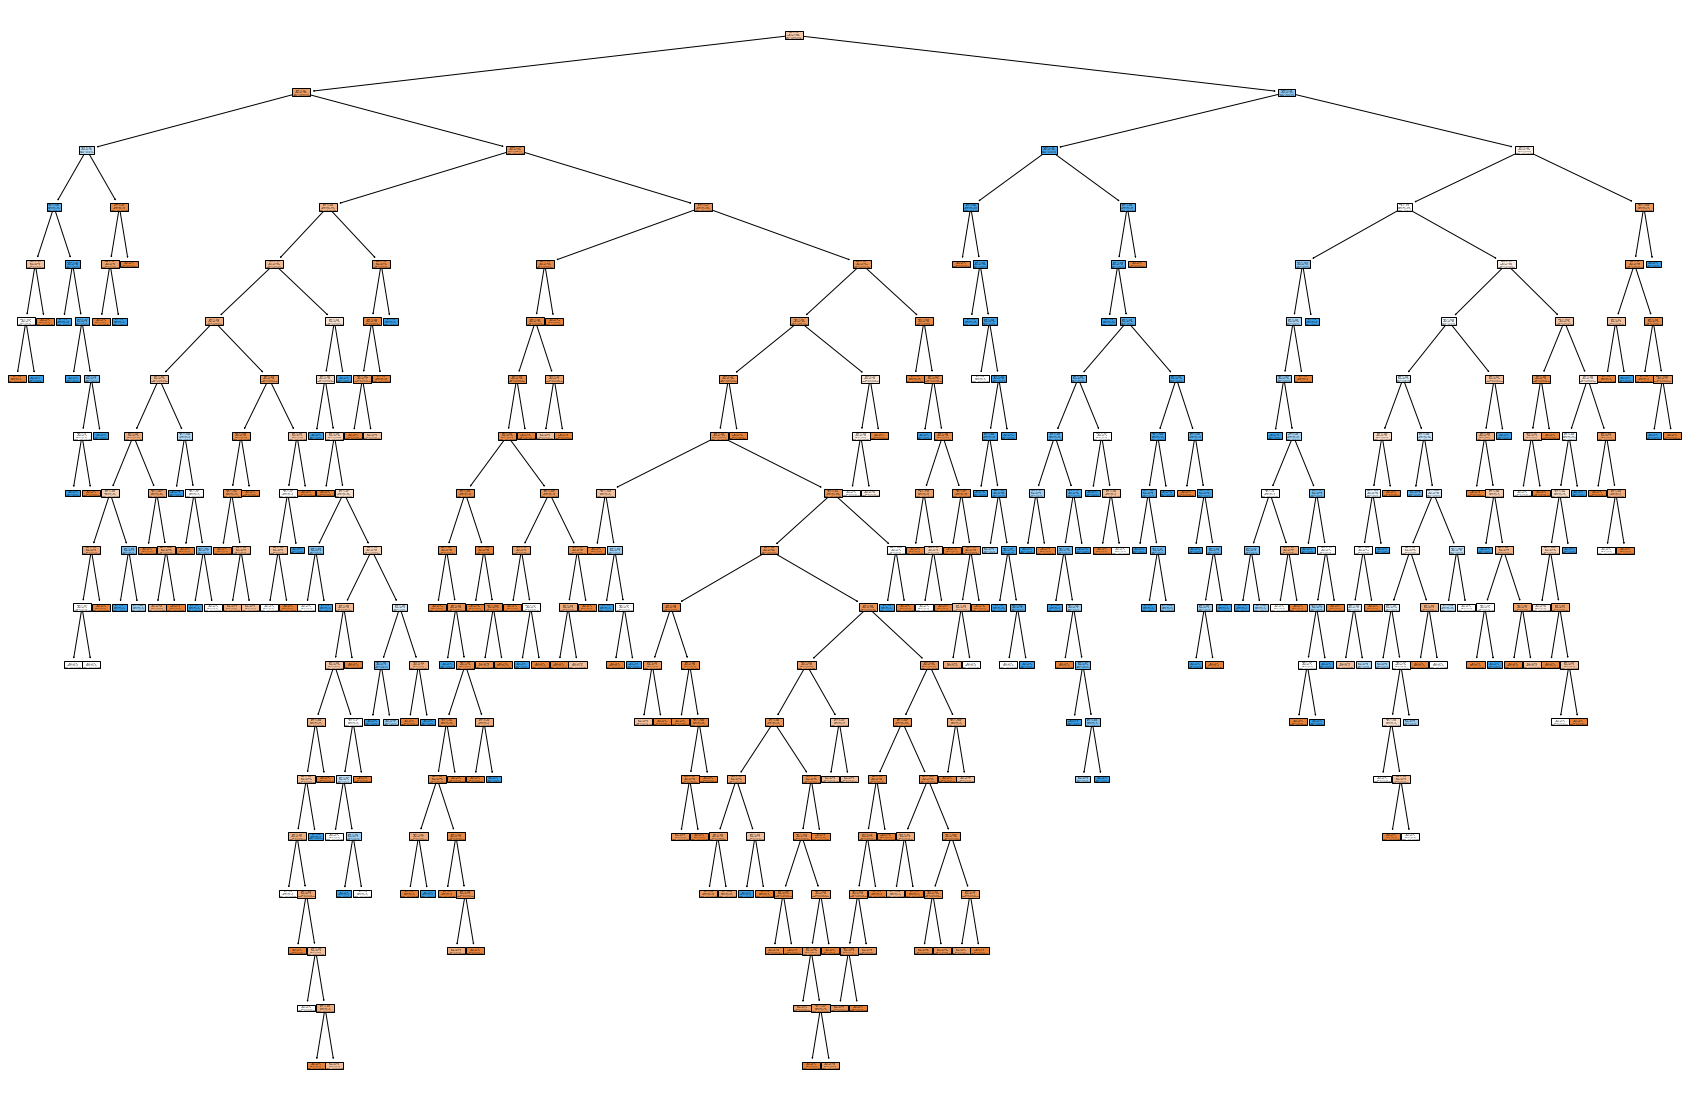

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
plt.figure(figsize=(30, 20))

plot_tree(tree, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)

# Step 3

Finding the best parameter max_leaf_nodes to prune the tree and plotting the pruned tree.

Best parameter: {'max_leaf_nodes': 14}
Best score: 0.81


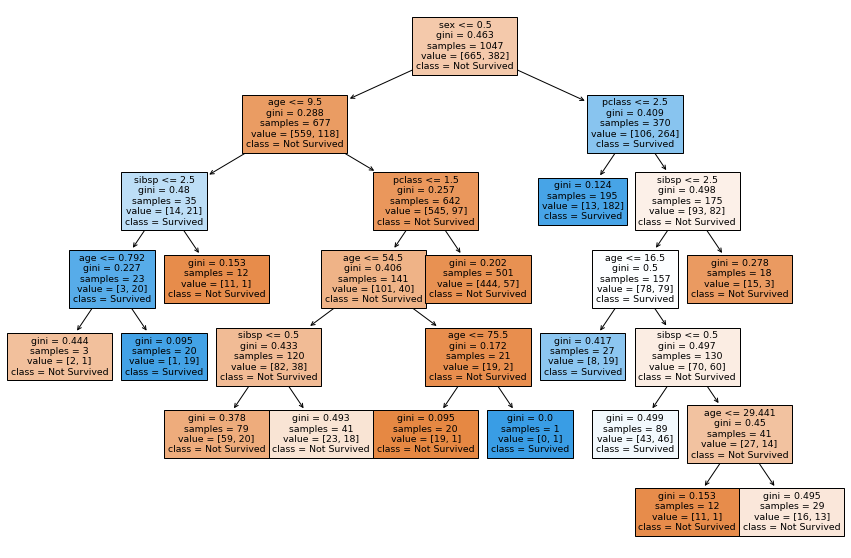

In [ ]:
tree = DecisionTreeClassifier(random_state=42)
param_grid = {'max_leaf_nodes': range(2, 20)}
grid_search = GridSearchCV(tree, param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameter: {}".format(grid_search.best_params_))
print("Best score: {:.2f}".format(grid_search.best_score_))
pruned_tree = grid_search.best_estimator_
plt.figure(figsize=(15,10))
plot_tree(pruned_tree, filled=True, feature_names=X_train.columns, class_names=['Not Survived', 'Survived'])
plt.show()

# Step 4

accuracy on the test set

In [ ]:
y_pred = pruned_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
survived_accuracy = accuracy_score(y_test[y_test == 1], y_pred[y_test == 1])
fatalities_accuracy = accuracy_score(y_test[y_test == 0], y_pred[y_test == 0])

print("Accuracy: {:.2f}%".format(accuracy * 100))
print('Survived accuracy: {:.2f}%'.format(survived_accuracy * 100))
print('Fatalities accuracy: {:.2f}%'.format(fatalities_accuracy * 100))

Accuracy: 75.57%
Survived accuracy: 59.32%
Fatalities accuracy: 88.89%


# Step 5

training a random forest using the value of max_leaf_nodes from step 3 which is 14 and reporting the accuracy of random forest on the test set.

Train a random forest and predict on the test set

In [ ]:
rf = RandomForestClassifier(n_estimators=50, max_leaf_nodes=pruned_tree.max_leaf_nodes,random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy on the test set

In [ ]:
accuracy_rf = accuracy_score(y_test, y_pred)
survived_correctly = accuracy_score(y_test[y_test == 1], y_pred[y_test == 1])
fatality_correctly = accuracy_score(y_test[y_test == 0], y_pred[y_test == 0])

print("Random Forest Accuracy: {:.2f}%".format(accuracy_rf * 100))
print("Percent Survivors Correctly Predicted: {:.2f}%".format(survived_correctly * 100))
print("Percent Fatalities Correctly Predicted: {:.2f}%".format(fatality_correctly * 100))

Random Forest Accuracy: 74.43%
Percent Survivors Correctly Predicted: 55.08%
Percent Fatalities Correctly Predicted: 90.28%


The accuracy of the random forest on the test set is slightly lower than the accuracy of the single decision tree obtained in Step 4. However, the percent survivors correctly predicted is slightly higher for the random forest than for the single tree, while the percent fatalities correctly predicted is slightly lower. It is important to note that the difference in accuracy between the two models is relatively small, so the choice between using a single decision tree or a random forest may depend on other factors such as model complexity, computational efficiency, and interpretability.